# Pré-Processamento
O objetivo desse notebook é realizar as mesmas etapas de pré-processamento feitas no artigo "[An Empirical and Statistical Analysis of Fetal Health Classification Using Different Machine Learning Algorithm](/An_Empirical_and_Statistical_Analysis_of_Fetal_Health_Classification_Using_Diffe.pdf).

## Importação de bibliotecas e configuração de notebook

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as min_max_scaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo as repo
from imblearn.under_sampling import CondensedNearestNeighbour

## Carregamento de dataset

In [74]:
cardiotocography = repo(id=193) 
X = cardiotocography.data.features 
y = cardiotocography.data.targets 

In [75]:
y = y.drop(columns=['CLASS'])

In [76]:
df = pd.concat([X, y], axis=1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [78]:
df.head().T

,0,1,2,3,4
LB,120.0,132.000,133.000,134.000,132.000
AC,0.0,0.006,0.003,0.003,0.007
FM,0.0,0.000,0.000,0.000,0.000
UC,0.0,0.006,0.008,0.008,0.008
DL,0.0,0.003,0.003,0.003,0.000
DS,0.0,0.000,0.000,0.000,0.000
DP,0.0,0.000,0.000,0.000,0.000
ASTV,73.0,17.000,16.000,16.000,16.000
MSTV,0.5,2.100,2.100,2.400,2.400
ALTV,43.0,0.000,0.000,0.000,0.000


In [79]:
df[df.columns.to_list()[:-1]].describe().T[['mean','std','min','25%','50%','75%','max']]

,mean,std,min,25%,50%,75%,max
LB,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
AC,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
FM,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
UC,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
DL,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
DS,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
DP,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
ASTV,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
MSTV,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
ALTV,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# Separação dos conjuntos

In [80]:
X = df.drop(columns=['NSP'])
y = df['NSP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

## Funções

## Distribuições das variáveis

In [81]:
df['NSP'].value_counts()

NSP
1    1655
2     295
3     176
Name: count, dtype: int64

In [82]:
df['NSP'].value_counts() / df.shape[0] * 100

NSP
1    77.845720
2    13.875823
3     8.278457
Name: count, dtype: float64

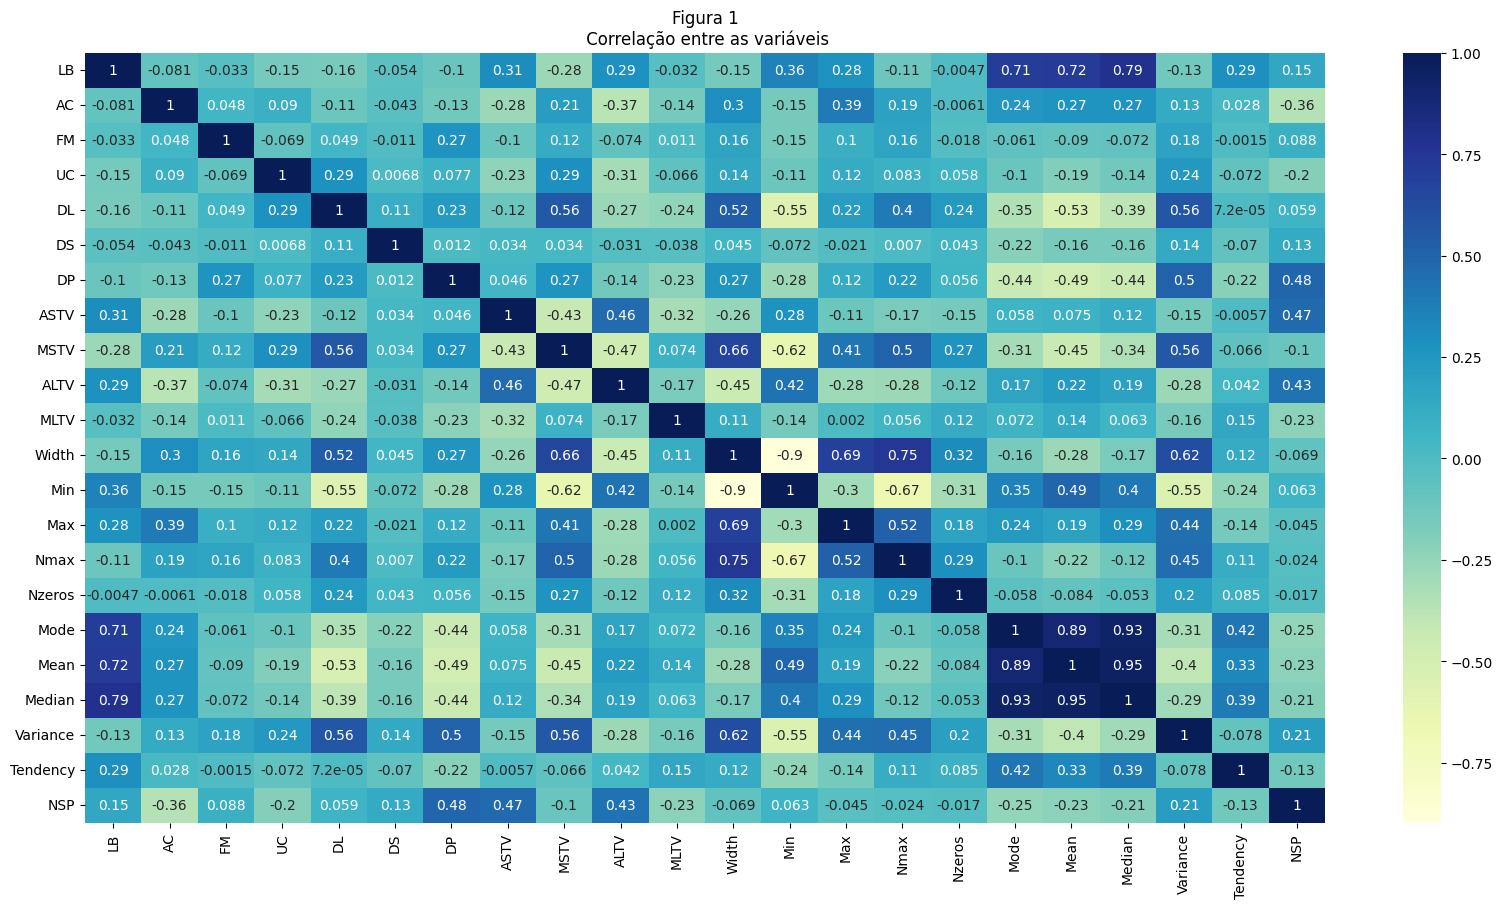

In [83]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Figura 1\n Correlação entre as variáveis')
plt.show()

## Balanceamento de dados

In [84]:
cnn = CondensedNearestNeighbour(sampling_strategy='majority', random_state=42, n_neighbors=5) 

In [85]:
X_balanced, y_balanced = cnn.fit_resample(X_train, y_train)
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

In [86]:
df_balanced.shape

(403, 22)

In [87]:
df_balanced['NSP'].value_counts()

NSP
2    209
3    118
1     76
Name: count, dtype: int64

In [88]:
df_balanced[df_balanced.columns.to_list()[:-1]].describe().T[['mean','std','min','25%','50%','75%','max']]

,mean,std,min,25%,50%,75%,max
LB,136.699752,10.192021,106.0,130.0,137.000,144.500,159.000
AC,0.000854,0.002101,0.0,0.0,0.000,0.000,0.014
FM,0.012533,0.055228,0.0,0.0,0.000,0.004,0.430
UC,0.003270,0.003144,0.0,0.0,0.003,0.006,0.014
DL,0.001878,0.003318,0.0,0.0,0.000,0.003,0.014
DS,0.000012,0.000111,0.0,0.0,0.000,0.000,0.001
DP,0.000452,0.000987,0.0,0.0,0.000,0.000,0.005
ASTV,60.677419,14.734302,13.0,57.0,63.000,69.500,86.000
MSTV,1.044665,0.978393,0.2,0.4,0.500,1.500,6.300
ALTV,25.114144,26.265992,0.0,0.0,17.000,45.000,91.000


In [89]:
describe = df[df.columns.to_list()[:-1]].describe().T[['mean','std','min','25%','50%','75%','max']].copy()
describe_balanced = df_balanced[df_balanced.columns.to_list()[:-1]].describe().T[['mean','std','min','25%','50%','75%','max']]
abs(describe - describe_balanced)

,mean,std,min,25%,50%,75%,max
LB,3.395895,0.351177,0.0,4.000,4.000,4.500,1.000
AC,0.002325,0.001765,0.0,0.000,0.002,0.006,0.005
FM,0.003053,0.008562,0.0,0.000,0.000,0.001,0.051
UC,0.001096,0.000198,0.0,0.002,0.001,0.001,0.001
DL,0.000011,0.000358,0.0,0.000,0.000,0.000,0.001
DS,0.000009,0.000054,0.0,0.000,0.000,0.000,0.000
DP,0.000293,0.000397,0.0,0.000,0.000,0.000,0.000
ASTV,13.687297,2.458511,1.0,25.000,14.000,8.500,1.000
MSTV,0.288120,0.095152,0.0,0.300,0.700,0.200,0.700
ALTV,15.267484,7.869113,0.0,0.000,17.000,34.000,0.000


## Normalização

In [90]:
scaler = min_max_scaler()

In [91]:
X_scaled = scaler.fit_transform(X_balanced)

In [92]:
X_test_scaled = scaler.fit_transform(X_test)

## Salvamento

In [93]:
df_scaled = pd.DataFrame(data=X_scaled, columns=df.columns.to_list()[:-1])
result = pd.concat([df_scaled,y_balanced], axis=1)
result.to_csv('CTG_train_pre_processado.csv', index=False)

In [94]:
df_scaled_test = pd.DataFrame(data=X_test_scaled, columns=df_balanced.columns.to_list()[:-1])
result_test = pd.concat([df_scaled_test, y_test ], axis=1)
result_test.to_csv('CTG_test_pre_processado.csv', index=False)